In [78]:
import glob
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import scipy as sp
import scipy.sparse.linalg as linalg
import scipy.cluster.hierarchy as hr
from scipy.spatial.distance import pdist, squareform
import statsmodels.api as sm
from sklearn import tree
from sklearn.cross_validation import train_test_split

/Users/namirfawaz/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [63]:
#Loading in all of the CSV files containing our cleaned up data.
path =r'/Users/namirfawaz/Documents/Fall_2017/CS506/SICK_Project/xml_to_csv'
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_, ignore_index=True)

/Users/namirfawaz/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [64]:
#Removing any files with no data or 0 data
frame = frame.dropna(how='any')
frame

,devicename,entry_timestamp,exit_timestamp,ole,owi,ohe,speed,incr,otl,oga
0,PS06Test,2017-07-03T23:57:58.264,2017-07-03T23:58:00.334,15.0,8.0,6.8,529.92,24665.0,16.14,42.8
1,PS06Test,2017-07-03T23:58:00.129,2017-07-03T23:58:02.224,16.8,24.2,6.6,529.92,27235.0,17.72,46.8
2,PS06Test,2017-07-03T23:58:02.338,2017-07-03T23:58:04.407,13.8,12.4,8.2,529.92,30210.0,15.35,55.6
3,PS06Test,2017-07-03T23:58:04.206,2017-07-03T23:58:06.358,23.8,12.8,6.4,529.92,32870.0,24.41,47.0
4,PS06Test,2017-07-03T23:58:06.479,2017-07-03T23:58:08.633,24.2,12.6,6.6,529.92,35970.0,24.41,55.8
5,PS06Test,2017-07-03T23:58:10.446,2017-07-03T23:58:12.600,23.6,17.8,6.4,529.92,41370.0,24.41,101.8
6,PS06Test,2017-07-03T23:58:13.029,2017-07-03T23:58:15.204,26.4,24.6,14.4,529.92,44920.0,27.17,64.2
7,PS06Test,2017-07-03T23:58:13.467,2017-07-03T23:58:15.516,13.0,15.0,4.6,529.92,45350.0,13.78,5.0
8,PS06Test,2017-07-03T23:58:14.347,2017-07-03T23:58:16.511,24.4,12.4,6.8,529.92,46700.0,25.59,20.5
9,PS06Test,2017-07-03T23:58:15.414,2017-07-03T23:58:17.522,17.6,12.4,6.4,529.92,48075.0,19.29,22.6


In [79]:
#Retrieving the speed column and adding it to a list
y_df = frame['speed']
y = []
for elem in y_df:
    y.append(elem)
    
#Dropping the rest of the data and keeping only ole, owi, and ohe
training_df = frame.drop(['speed', 'entry_timestamp', 'exit_timestamp', 
                          'devicename', 'incr', 'otl', 'oga'], axis=1)

#Converting to a matrix
x = training_df.as_matrix()

#Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [83]:
#Creating Linear Regression model with y as speed and x as package dimensions
model = sm.OLS(y_train, x_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                 2.390e+05
Date:                Sun, 10 Dec 2017   Prob (F-statistic):               0.00
Time:                        15:47:54   Log-Likelihood:            -6.2743e+06
No. Observations:              846976   AIC:                         1.255e+07
Df Residuals:                  846973   BIC:                         1.255e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.4186      0.070     77.717      0.0

In [81]:
#Searching for any non-significant data to remove, finding that almost all data is significant
CIs = results.conf_int()
notSignificant = (CIs[:,0] < 0) & (CIs[:,1] > 0)
notSignificant

NS_indexes = []
index_count = 0
for elem in notSignificant:
    if elem == True:
        NS_indexes.append(index_count)
    index_count+=1

notSignificant

array([False, False, False], dtype=bool)

In [84]:
#Removing the non significant data and rebuilding the Linear Regression model, only to find the R-squared 
#value stays the same
Xsignif = x_train[:,~notSignificant]
Xsignif.shape
model = sm.OLS(y_train, Xsignif)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                 2.390e+05
Date:                Sun, 10 Dec 2017   Prob (F-statistic):               0.00
Time:                        15:48:15   Log-Likelihood:            -6.2743e+06
No. Observations:              846976   AIC:                         1.255e+07
Df Residuals:                  846973   BIC:                         1.255e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.4186      0.070     77.717      0.0

<function matplotlib.pyplot.show>

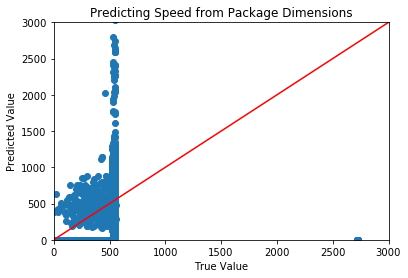

In [113]:
#Plotting the predicted value of speed against the true value, using our model to predict 
%matplotlib inline 
plt.figsize=(12,5)
y_1_predict = results.predict(x_test)
plt.scatter(y_test, y_1_predict)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.plot([0,3000],[0,3000],'r-')
plt.ylim(ymin=0, ymax=3000)
plt.xlim(xmin=0, xmax=3000)
plt.title('Predicting Speed from Package Dimensions')
plt.show

In [75]:
#Creating a list of volumes by multiplying the length, width, and height
volume_data = []
for index, row in training_df.iterrows():
    ole = row['ole']
    owi = row['owi']
    ohe = row['ohe']
    volume = ole * owi * ohe
    volume_data.append(volume)

volume_data

[816.0,
 2683.2959999999998,
 1403.184,
 1949.6960000000004,
 2012.4719999999995,
 2688.5120000000006,
 9351.9360000000015,
 896.99999999999989,
 2057.4079999999999,
 1396.7360000000003,
 1872.8960000000004,
 2002.1760000000004,
 282.24000000000001,
 465.69599999999991,
 819.62400000000002,
 2688.5120000000006,
 825.69599999999991,
 854.25599999999997,
 1384.4159999999997,
 829.44000000000005,
 2650.3680000000004,
 367.74400000000003,
 1670.8800000000001,
 829.44000000000005,
 2059.1999999999998,
 516.0,
 6546.3360000000002,
 1242.2160000000001,
 2055.5600000000004,
 3588.4800000000005,
 1499.9040000000002,
 778.79999999999995,
 2108.5439999999999,
 1645.7280000000003,
 2756.1599999999994,
 2859.192,
 2733.192,
 1538.7839999999999,
 2672.6399999999999,
 1331.712,
 2079.7919999999999,
 1999.3760000000002,
 1999.3760000000002,
 2628.096,
 4394.808,
 4775.2320000000009,
 3096.1680000000001,
 2733.192,
 1396.6559999999999,
 2650.3680000000004,
 886.70399999999995,
 2119.9359999999997,
 214

In [107]:
#Splitting the data in to training and testing data, and building a new model with the volume
x_train_volume, x_test_volume, y_train_volume, y_test_volume = train_test_split(volume_data, y, test_size=0.3, random_state=0)
model_volume = sm.OLS(y_train_volume, x_train_volume)
results_volume = model_volume.fit()
print(results_volume.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                 1.836e+05
Date:                Sun, 10 Dec 2017   Prob (F-statistic):               0.00
Time:                        16:27:11   Log-Likelihood:            -6.4509e+06
No. Observations:              846976   AIC:                         1.290e+07
Df Residuals:                  846975   BIC:                         1.290e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0683      0.000    428.482      0.0

<function matplotlib.pyplot.show>

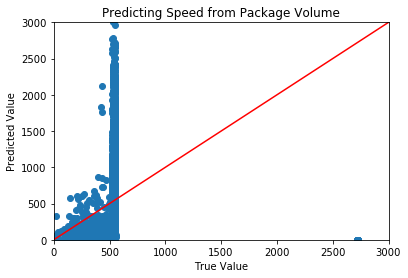

In [111]:
#Using the new model's predictions of speed based on package volume, and plotting them against the true value
%matplotlib inline 
plt.figsize=(12,5)
y_volume_predict = results_volume.predict(x_test_volume)
plt.scatter(y_test_volume, y_volume_predict)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.plot([0,3000],[0,3000],'r-')
plt.ylim([0,3000])
_ = plt.xlim([0,3000])
plt.title('Predicting Speed from Package Volume')
plt.show

In [114]:
#Using only length of packages to build a Linear Regression Model
ole_data = []
ole_df = training_df['ole']
for elem in ole_df:
    ole_data.append(elem)
x_train_ole, x_test_ole, y_train_ole, y_test_ole = train_test_split(ole_data, y, test_size=0.3, random_state=0)
model_ole = sm.OLS(y_train_ole, x_train_ole)
results_ole = model_ole.fit()
print(results_ole.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                 5.765e+05
Date:                Sun, 10 Dec 2017   Prob (F-statistic):               0.00
Time:                        17:48:47   Log-Likelihood:            -6.3141e+06
No. Observations:              846976   AIC:                         1.263e+07
Df Residuals:                  846975   BIC:                         1.263e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            23.5049      0.031    759.265      0.0

<function matplotlib.pyplot.show>

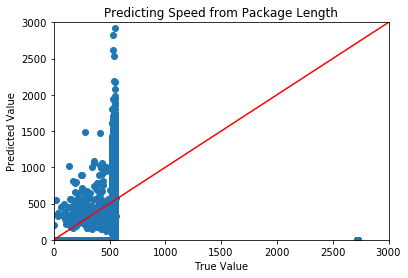

In [115]:
#Using the new model's predictions of speed based on package length, and plotting them against the true value
%matplotlib inline 
plt.figsize=(12,5)
y_ole_predict = results_ole.predict(x_test_ole)
plt.scatter(y_test_ole, y_ole_predict)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.plot([0,3000],[0,3000],'r-')
plt.ylim([0,3000])
_ = plt.xlim([0,3000])
plt.title('Predicting Speed from Package Length')
plt.show

In [118]:
#Using only width of packages to build a Linear Regression Model
owi_data = []
owi_df = training_df['owi']
for elem in owi_df:
    owi_data.append(elem)
x_train_owi, x_test_owi, y_train_owi, y_test_owi = train_test_split(owi_data, y, test_size=0.3, random_state=0)
model_owi = sm.OLS(y_train_owi, x_train_owi)
results_owi = model_owi.fit()
print(results_owi.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                 6.880e+05
Date:                Sun, 10 Dec 2017   Prob (F-statistic):               0.00
Time:                        17:52:23   Log-Likelihood:            -6.2822e+06
No. Observations:              846976   AIC:                         1.256e+07
Df Residuals:                  846975   BIC:                         1.256e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            34.7084      0.042    829.466      0.0

<function matplotlib.pyplot.show>

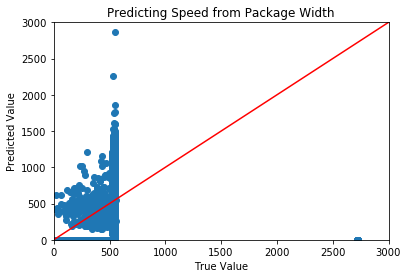

In [119]:
#Using the new model's predictions of speed based on package width, and plotting them against the true value
%matplotlib inline 
plt.figsize=(12,5)
y_owi_predict = results_owi.predict(x_test_owi)
plt.scatter(y_test_owi, y_owi_predict)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.plot([0,3000],[0,3000],'r-')
plt.ylim([0,3000])
_ = plt.xlim([0,3000])
plt.title('Predicting Speed from Package Width')
plt.show

In [120]:
#Using only height of packages to build a Linear Regression Model
ohe_data = []
ohe_df = training_df['ohe']
for elem in ohe_df:
    ohe_data.append(elem)
x_train_ohe, x_test_ohe, y_train_ohe, y_test_ohe = train_test_split(ohe_data, y, test_size=0.3, random_state=0)
model_ohe = sm.OLS(y_train_ohe, x_train_ohe)
results_ohe = model_ohe.fit()
print(results_ohe.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                 5.996e+05
Date:                Sun, 10 Dec 2017   Prob (F-statistic):               0.00
Time:                        17:54:31   Log-Likelihood:            -6.3073e+06
No. Observations:              846976   AIC:                         1.261e+07
Df Residuals:                  846975   BIC:                         1.261e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            49.3348      0.064    774.327      0.0

<function matplotlib.pyplot.show>

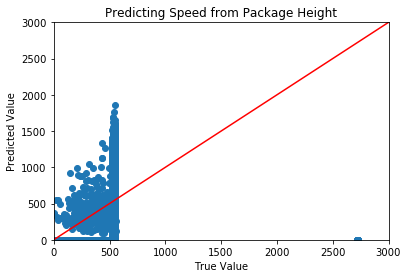

In [121]:
#Using the new model's predictions of speed based on package height, and plotting them against the true value
%matplotlib inline 
plt.figsize=(12,5)
y_ohe_predict = results_ohe.predict(x_test_ohe)
plt.scatter(y_test_ohe, y_ohe_predict)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.plot([0,3000],[0,3000],'r-')
plt.ylim([0,3000])
_ = plt.xlim([0,3000])
plt.title('Predicting Speed from Package Height')
plt.show